<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/11_1_SVM_exhaustif_avec_kernel_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPPORT VECTOR MACHINES - DÉMONSTRATION COMPLÈTE
Création de 3 datasets de complexité croissante:
  • Dataset Linéaire: 200 points, séparable par ligne droite
  • Dataset Cercles: 200 points, nécessite kernel non-linéaire
  • Dataset Complexe: 400 points, clusters multiples

Comparaison des kernels SVM:

Dataset Linéaire:
------------------------------
  Kernel Linéaire (ligne droite): 0.867 (86.7%)
  Kernel RBF (Gaussien): 0.850 (85.0%)
  Kernel Polynomial: 0.717 (71.7%)
  Kernel Sigmoïde: 0.733 (73.3%)

Dataset Cercles:
------------------------------
  Kernel Linéaire (ligne droite): 0.600 (60.0%)
  Kernel RBF (Gaussien): 1.000 (100.0%)
  Kernel Polynomial: 0.583 (58.3%)
  Kernel Sigmoïde: 0.683 (68.3%)

Dataset Complexe:
------------------------------
  Kernel Linéaire (ligne droite): 0.892 (89.2%)
  Kernel RBF (Gaussien): 0.900 (90.0%)
  Kernel Polynomial: 0.892 (89.2%)
  Kernel Sigmoïde: 0.808 (80.8%)


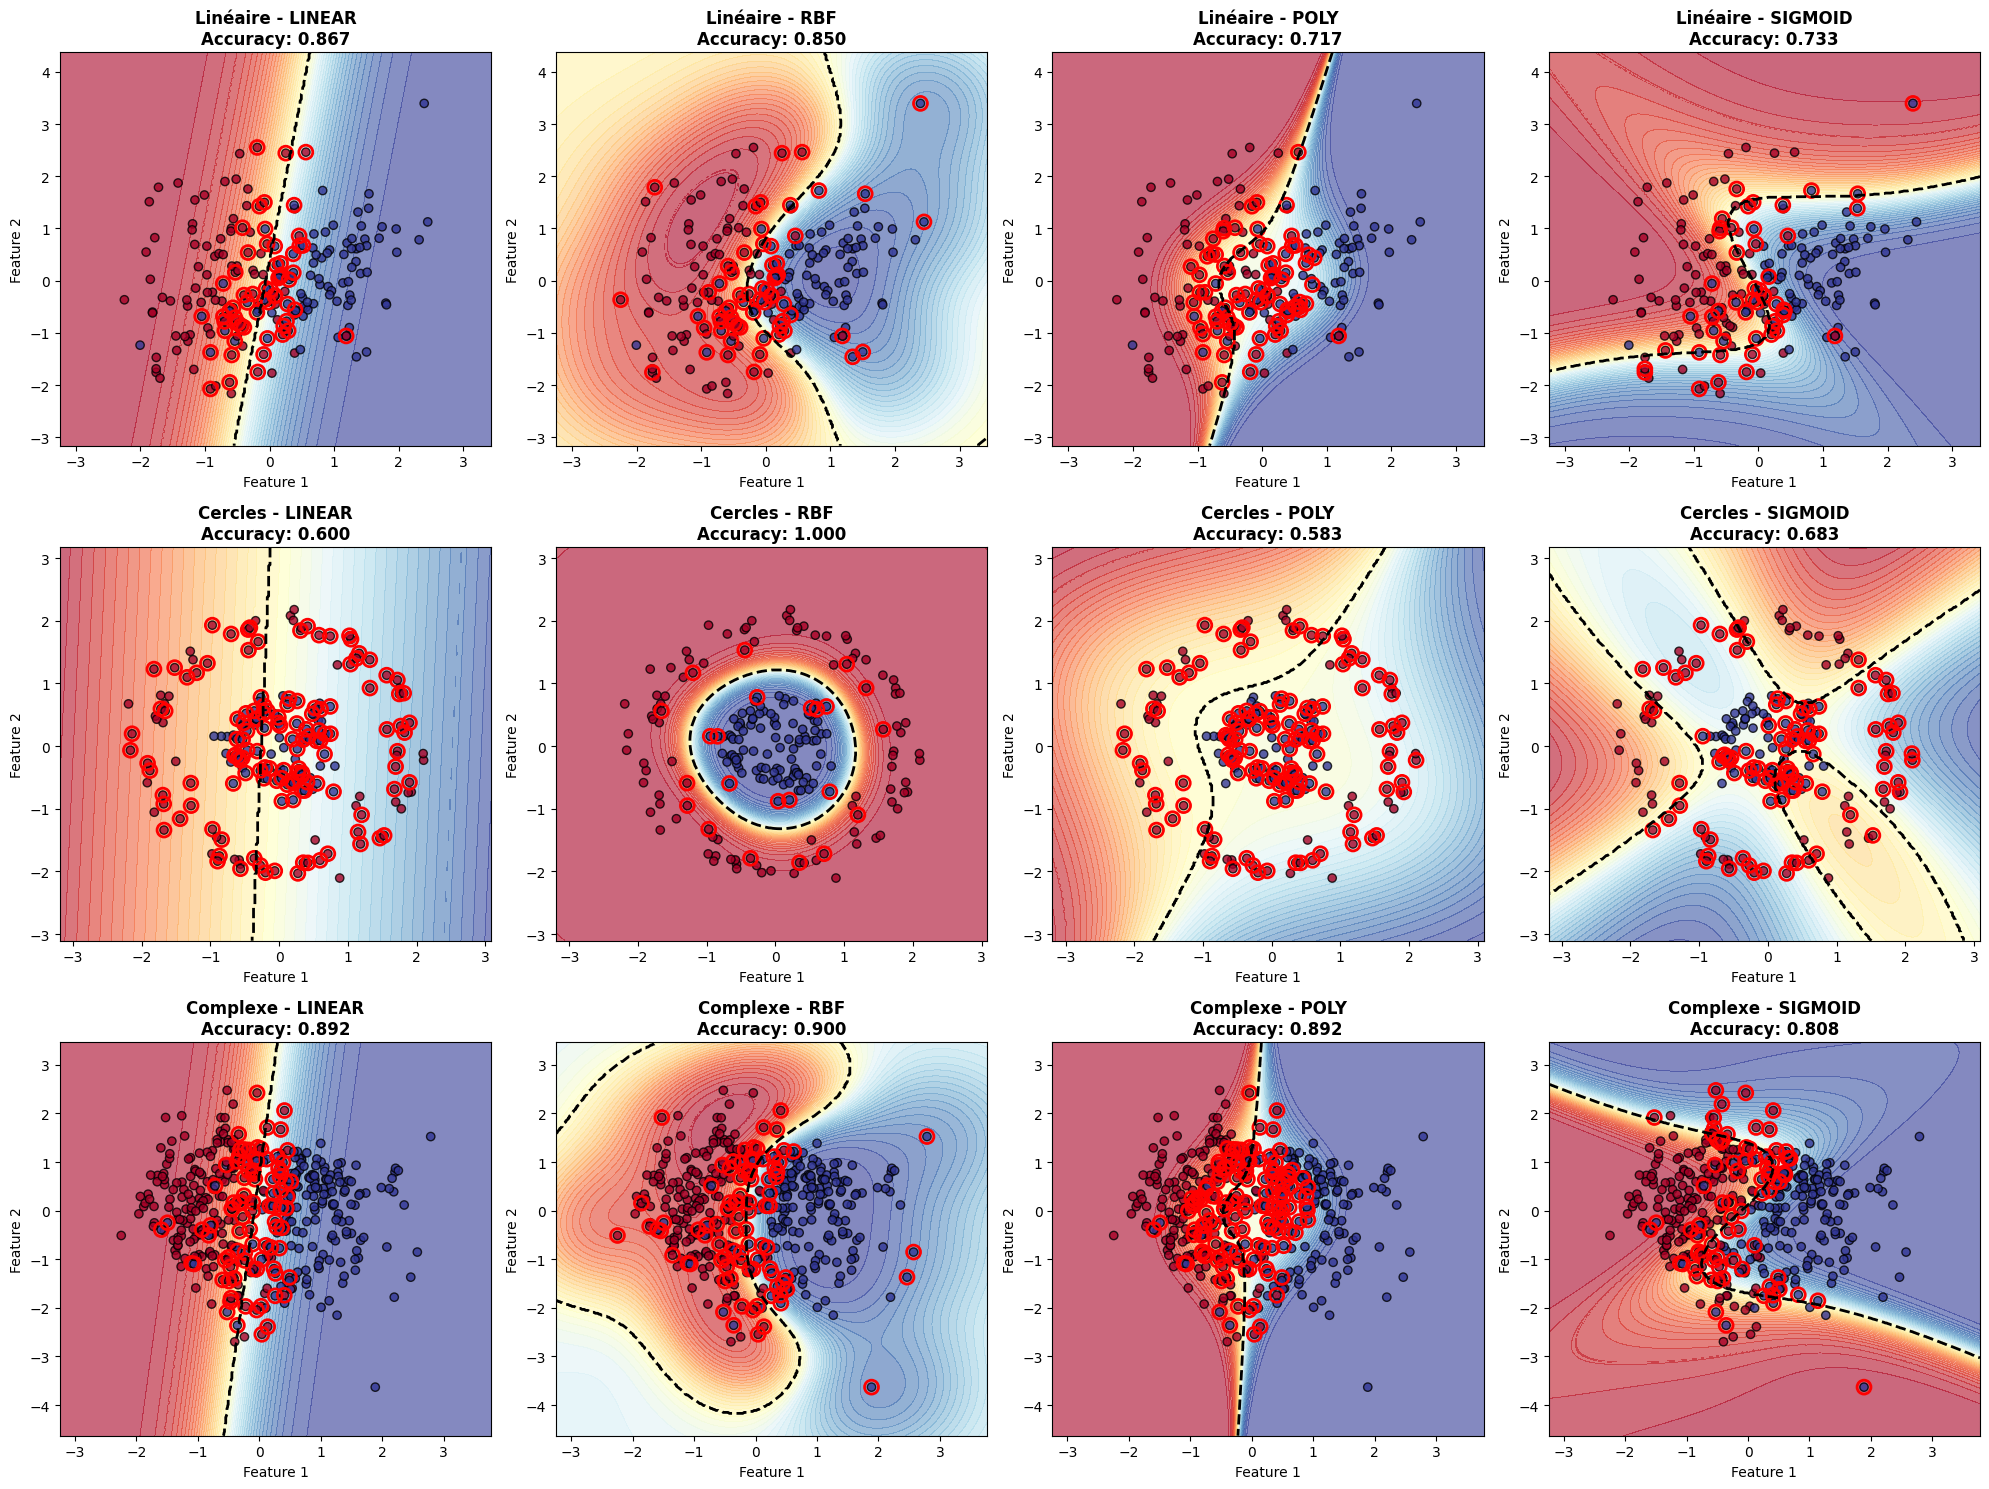


Analyse des Support Vectors:
Analyse du modèle SVM RBF optimal:
  • Nombre de support vectors: 90
  • Support vectors classe 0: 46
  • Support vectors classe 1: 44
  • Pourcentage de support vectors: 32.1%

Optimisation des hyperparamètres SVM:
Recherche des hyperparamètres optimaux...
Paramètres testés:
  • C (régularisation): [0.1, 1, 10, 100]
  • Gamma (kernel RBF): [0.001, 0.01, 0.1, 1]
  • Kernels: ['rbf', 'poly']

Meilleurs paramètres trouvés:
  • C optimal: 0.1
  • Gamma optimal: 1
  • Kernel optimal: rbf
  • Score CV optimal: 0.9107

Performance du modèle optimisé:
  • Accuracy test: 0.8917 (89.2%)

Interprétation des paramètres optimaux:
Paramètre C = 0.1:
  • Régularisation forte - Modèle simple
  • Frontière lisse mais peut manquer des détails

Paramètre Gamma = 1:
  • Influence locale forte
  • Frontière complexe suivant les détails


In [1]:
#SVM exhaustif avec kernel trick
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_circles
import numpy as np
import matplotlib.pyplot as plt

# Démonstration complète de SVM
print("SUPPORT VECTOR MACHINES - DÉMONSTRATION COMPLÈTE")
print("=" * 70)

np.random.seed(42)

# Créer différents types de problèmes pour montrer la puissance de SVM
print("Création de 3 datasets de complexité croissante:")

# Dataset 1: Linéairement séparable
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                        n_informative=2, n_clusters_per_class=1,
                                        random_state=42)

# Dataset 2: Non-linéaire (cercles concentriques)
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)

# Dataset 3: Très complexe
X_complex, y_complex = make_classification(n_samples=400, n_features=2, n_redundant=0,
                                          n_informative=2, n_clusters_per_class=2,
                                          class_sep=0.8, random_state=42)

datasets = {
    'Linéaire': (X_linear, y_linear),
    'Cercles': (X_circles, y_circles),
    'Complexe': (X_complex, y_complex)
}

print(f"  • Dataset Linéaire: {len(X_linear)} points, séparable par ligne droite")
print(f"  • Dataset Cercles: {len(X_circles)} points, nécessite kernel non-linéaire")
print(f"  • Dataset Complexe: {len(X_complex)} points, clusters multiples")

# Tester différents kernels SVM
kernels = {
    'linear': 'Kernel Linéaire (ligne droite)',
    'rbf': 'Kernel RBF (Gaussien)',
    'poly': 'Kernel Polynomial',
    'sigmoid': 'Kernel Sigmoïde'
}

print(f"\nComparaison des kernels SVM:")
print("=" * 60)

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for dataset_idx, (dataset_name, (X, y)) in enumerate(datasets.items()):
    print(f"\nDataset {dataset_name}:")
    print("-" * 30)

    # Standardiser (crucial pour SVM)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Diviser les données
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    for kernel_idx, (kernel_name, kernel_desc) in enumerate(kernels.items()):
        # Entraîner SVM avec ce kernel
        svm_model = SVC(kernel=kernel_name, random_state=42, probability=True)

        try:
            svm_model.fit(X_train, y_train)
            accuracy = svm_model.score(X_test, y_test)

            print(f"  {kernel_desc}: {accuracy:.3f} ({accuracy:.1%})")

            # Visualiser la frontière de décision
            ax = axes[dataset_idx, kernel_idx]

            # Créer une grille pour visualiser la frontière
            h = 0.02
            x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
            y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                np.arange(y_min, y_max, h))

            # Prédictions sur la grille
            mesh_points = np.c_[xx.ravel(), yy.ravel()]
            Z = svm_model.predict_proba(mesh_points)[:, 1]
            Z = Z.reshape(xx.shape)

            # Tracer la frontière
            ax.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
            ax.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)

            # Tracer les points
            scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='RdYlBu',
                               edgecolors='black', alpha=0.8)

            # Marquer les support vectors
            if hasattr(svm_model, 'support_'):
                support_vectors = X_train[svm_model.support_]
                ax.scatter(support_vectors[:, 0], support_vectors[:, 1],
                          s=100, facecolors='none', edgecolors='red', linewidths=2)

            ax.set_title(f'{dataset_name} - {kernel_name.upper()}\nAccuracy: {accuracy:.3f}',
                        fontweight='bold')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')

        except Exception as e:
            print(f"  {kernel_desc}: ERREUR ({str(e)[:30]})")
            ax = axes[dataset_idx, kernel_idx]
            ax.text(0.5, 0.5, f'Erreur\n{kernel_name}', ha='center', va='center',
                   transform=ax.transAxes, fontweight='bold', color='red')
            ax.set_title(f'{dataset_name} - {kernel_name.upper()}\nERREUR', fontweight='bold')

plt.tight_layout()
plt.show()

# Analyser les support vectors
print(f"\nAnalyse des Support Vectors:")
print("=" * 50)

# Prendre le meilleur modèle (RBF sur dataset complexe)
X_best, y_best = datasets['Complexe']
scaler_best = StandardScaler()
X_best_scaled = scaler_best.fit_transform(X_best)
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_best_scaled, y_best, test_size=0.3, random_state=42
)

svm_best = SVC(kernel='rbf', random_state=42)
svm_best.fit(X_train_best, y_train_best)

print(f"Analyse du modèle SVM RBF optimal:")
print(f"  • Nombre de support vectors: {len(svm_best.support_)}")
print(f"  • Support vectors classe 0: {len(svm_best.support_vectors_[y_train_best[svm_best.support_] == 0])}")
print(f"  • Support vectors classe 1: {len(svm_best.support_vectors_[y_train_best[svm_best.support_] == 1])}")
print(f"  • Pourcentage de support vectors: {len(svm_best.support_)/len(X_train_best)*100:.1f}%")

# Optimisation des hyperparamètres
print(f"\nOptimisation des hyperparamètres SVM:")
print("=" * 50)

# Grid Search pour trouver les meilleurs paramètres
param_grid = {
    'C': [0.1, 1, 10, 100],           # Paramètre de régularisation
    'gamma': [0.001, 0.01, 0.1, 1],  # Paramètre du kernel RBF
    'kernel': ['rbf', 'poly']
}

print("Recherche des hyperparamètres optimaux...")
print("Paramètres testés:")
print(f"  • C (régularisation): {param_grid['C']}")
print(f"  • Gamma (kernel RBF): {param_grid['gamma']}")
print(f"  • Kernels: {param_grid['kernel']}")

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_best, y_train_best)

print(f"\nMeilleurs paramètres trouvés:")
print(f"  • C optimal: {grid_search.best_params_['C']}")
print(f"  • Gamma optimal: {grid_search.best_params_['gamma']}")
print(f"  • Kernel optimal: {grid_search.best_params_['kernel']}")
print(f"  • Score CV optimal: {grid_search.best_score_:.4f}")

# Modèle final optimisé
svm_optimal = grid_search.best_estimator_
accuracy_optimal = svm_optimal.score(X_test_best, y_test_best)

print(f"\nPerformance du modèle optimisé:")
print(f"  • Accuracy test: {accuracy_optimal:.4f} ({accuracy_optimal:.1%})")

# Interpréter l'impact des paramètres
print(f"\nInterprétation des paramètres optimaux:")
print("=" * 50)

C_optimal = grid_search.best_params_['C']
gamma_optimal = grid_search.best_params_['gamma']

print(f"Paramètre C = {C_optimal}:")
if C_optimal >= 10:
    print("  • Régularisation faible - Modèle complexe")
    print("  • Risque d'overfitting mais frontière précise")
elif C_optimal >= 1:
    print("  • Régularisation modérée - Bon équilibre")
    print("  • Compromis entre simplicité et précision")
else:
    print("  • Régularisation forte - Modèle simple")
    print("  • Frontière lisse mais peut manquer des détails")

print(f"\nParamètre Gamma = {gamma_optimal}:")
if gamma_optimal >= 0.1:
    print("  • Influence locale forte")
    print("  • Frontière complexe suivant les détails")
elif gamma_optimal >= 0.01:
    print("  • Influence modérée")
    print("  • Bon compromis complexité/généralisation")
else:
    print("  • Influence étendue")
    print("  • Frontière lisse et générale")